In [49]:
"""
 For a given dataset predict number of bikes getting shared based on temperature of the day
"""

'\n For a given dataset predict number of bikes getting shared based on temperature of the day\n'

In [50]:
import numpy as np
# import matplotlib.plotly as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd
#imputer to handle missing data 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split

# handle categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import LinearRegression
#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *
import pickle 
#visualization in 3D
from mpl_toolkits.mplot3d import Axes3D
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import os, sys
import csv

In [72]:
# load dataset
dataset_original = pd.read_csv ("bike_sharing.csv")
dataset = dataset_original
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [116]:
# IN simple LR we want only 1 feature and 1 lable
dataset = dataset.loc[:,['temp','cnt']]
# dataset.drop(['dteday'], axis = 1, inplace = True)

In [117]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 17379 rows and 2 Columns


In [118]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 2 columns):
temp    17379 non-null float64
cnt     17379 non-null int64
dtypes: float64(1), int64(1)
memory usage: 271.6 KB


In [119]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,17379.0,0.496987,0.192556,0.02,0.34,0.5,0.66,1.0
cnt,17379.0,189.463088,181.387599,1.00,40.00,142.0,281.00,977.0


In [120]:
# handling missing data if nessesary
"""
if missing values are present
imputer = Imputer(missing_values=0, axis=0)
imputer = imputer.fit(x_data[:, 3:16])
"""
dataset.isnull().sum()

temp    0
cnt     0
dtype: int64

In [124]:
# check for minimum dataset
dataset.min()

temp    0.02
cnt     1.00
dtype: float64

In [125]:
# # Handle Missing data
# def handle_min_values(dataset):
#     # replace min values by mean
#     dataset.replace(0, dataset.mean(), inplace=True)
#     return dataset

# dataset = handle_min_values(dataset)

In [126]:
#check dataset replace with mean or not
dataset.min()

temp    0.02
cnt     1.00
dtype: float64

In [86]:
# # seperate fetures and label
# x_data = dataset.iloc[:, :-1].values
# y_data = dataset.iloc[:, 1].values

In [87]:
# print(x_data.shape, y_data.shape)

(17379, 15) (17379,)


In [62]:
# # handle categorical data
# def handle_categorical_data(x_data):
#     #encode categorical data
#     label_encod = LabelEncoder()
#     x_data[:, 1] = label_encod.fit_transform(x_data[:, 1])
    
#     # one hot encoding
#     onehotencode = OneHotEncoder(categorical_features= [1])
#     x_data = onehotencode.fit_transform(x_data).toarray()
    
#     return x_data
    
# x_data = handle_categorical_data(x_data)

In [65]:
# #convert numpy.ndarray to DataFrame
# x_data = pd.DataFrame(x_data)
# x_data.shape

In [92]:
# create directory to store csv files
os.mkdir("CSV_files")

In [139]:
# split dataset 

def splitdata(dataset):
    # split train and test data
    train, test = train_test_split(dataset,test_size = 0.30, random_state=0)
    print("train : ", train.shape, " test : ", test.shape)

    # saving datasets into csv files
    test.to_csv('CSV_files/test_file.csv',index=False,encoding='utf-8')

    # divide train data into train and cross validation 
    train_data, crossV_data = train_test_split(train,test_size = 0.20,random_state=0)
    
     #load data into csv for train and cross validation
    train_data.to_csv('CSV_files/train_file.csv',index=False,encoding='utf-8')
    crossV_data.to_csv('CSV_files/CValidation_file.csv',index=False,encoding='utf-8')
    
    print("train_data : ", train_data.shape, " crossV_data : ", crossV_data.shape)

splitdata(dataset)

train :  (12165, 2)  test :  (5214, 2)
train_data :  (9732, 2)  crossV_data :  (2433, 2)


In [140]:
# load dataset
train_dataset = pd.read_csv ("CSV_files/train_file.csv")
print("Dataset has {} rows and {} Columns".format(train_dataset.shape[0],train_dataset.shape[1])) 

Dataset has 9732 rows and 2 Columns


In [141]:
train_dataset.head()

,temp,cnt
0,0.20,110
1,0.24,23
2,0.70,68
3,0.42,322
4,0.72,6


(9732, 1) (9732,)

Module created

Pikle file created


 y_prediction: [ 75.22883988  90.35305766 264.28156215 ... 249.15734437  97.91516655
 113.03938433]

 Accuracy train by acc_r2 83.85999557694463

 Accuracy train by mean_ab 98.71116066204017

 Accuracy train by mean_sq 27404.943675298837

 Accuracy train by mean_sq_log 2.0556367309433754

 Accuracy train by median_ab_error 98.81730990590731
(9732, 1) (9732, 1)


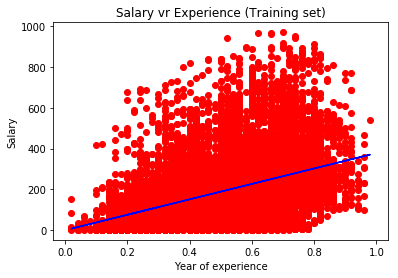

In [169]:
class simpleLR():
    
    def create_module(self,x_train,y_train):
        
        # fitting simple LR to the training set
        regression = LinearRegression()
    #      regression.fit(x_train_data, y_train_data)
        regression.fit(x_train,y_train)
        """
        output-
        LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
             normalize=False)
        """
        return regression
    
    def create_piklefile(self,regression):
        # dump train model pickle file
        file = open('SimpleLRModulefile.pkl', 'wb')
        pickle.dump(regression,file)
        file.close()
        
    def y_prediction(self,regression, x_train):
        # predicting the test set result
        return regression.predict(x_train)
    
    def accuracy(self,y_predict_train,y_train):
        # accuracy using r2 score
        error = r2_score(y_train, y_predict_train)      
        acc_r2 = (1-error)*100
  
        total_error = mean_absolute_error(y_train, y_predict_train)
        mean_ab=( 1- (total_error / len(y_train))) *100
        
        mean_sq  = mean_squared_error(y_train, y_predict_train) 

        mean_sq_log = mean_squared_log_error(y_train, y_predict_train)  
    
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        
        return acc_r2,mean_ab,mean_sq,mean_sq_log, median_ab_error
    

    
    def visualization(self,x_train,y_train,y_predict_train):
        # Visualization the training set result
        print(x_train.shape, y_train.shape)
        plt.scatter(x_train,y_train, color = 'red')
        plt.plot(x_train,y_predict_train, color = 'blue')
        plt.title("Salary vr Experience (Training set)")
        plt.xlabel("Year of experience")
        plt.ylabel("Salary")
        plt.show()
        

def main():
    #class obj created
    obj  = simpleLR()
    
    # seperate fetures and label
    x_train = train_dataset.iloc[:,:-1].values
    y_train = train_dataset.iloc[:,1].values  

    print(x_train.shape, y_train.shape)
    regression = obj.create_module(x_train,y_train)
    print("\nModule created")
    
    obj.create_piklefile(regression)
    print("\nPikle file created")
    
    y_train_pre = obj.y_prediction(regression, x_train)
    print("\n\n y_prediction:",y_train_pre)
    
    acc_r2,mean_ab,mean_sq,mean_sq_log, median_ab_error = obj.accuracy(y_train_pre,y_train)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by mean_ab", mean_ab)
    print("\n Accuracy train by mean_sq", mean_sq)
    print("\n Accuracy train by mean_sq_log", mean_sq_log)
    print("\n Accuracy train by median_ab_error", median_ab_error)
    
    y_train = y_train.reshape(-1, 1)
    
    obj.visualization(x_train,y_train, y_train_pre)

if __name__ == '__main__':
    main()


In [143]:
# Cross Validation

# load dataset
CV_dataset = pd.read_csv ("CSV_files/CValidation_file.csv")
print("Dataset has {} rows and {} Columns".format(CV_dataset.shape[0],CV_dataset.shape[1])) 

Dataset has 2433 rows and 2 Columns


In [144]:
    #cross validation
file1 = open('SimpleLRModulefile.pkl', 'rb')
reg1 = pickle.load(file1)

(2433, 1) (2433,)


 y_prediction: [120.60149322 264.28156215 264.28156215 ... 165.97414657 211.34679992
 165.97414657]

 Accuracy train by acc_r2 84.16166671670855

 Accuracy train by median_ab_error 99.09836435145141


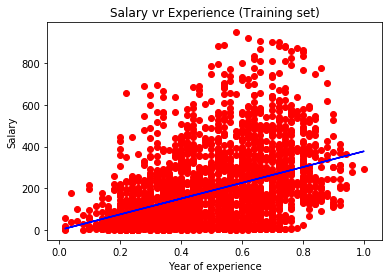

In [170]:
class Cross_validation():
           
    def y_prediction(self,regression, x_train):
        # predicting the test set result
        return regression.predict(x_train)
    
    def accuracy(self,y_predict_train,y_train):
        # acc using r2
        error = r2_score(y_train, y_predict_train)      
        acc_r2 = (1-error)*100
        
        # using median_ab_error
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        return acc_r2, median_ab_error
    
    def visualization(self,x_train,y_train, y_cv_pre):
        # Visualization the training set result
        plt.scatter(x_train,y_train, color = 'red')
        plt.plot(x_train,y_cv_pre, color = 'blue')
        plt.title("Salary vr Experience (Training set)")
        plt.xlabel("Year of experience")
        plt.ylabel("Salary")
        plt.show()
        

def main():
    #class obj created
    obj  = Cross_validation()
    
    # seperate fetures and label
    x_cv = CV_dataset.iloc[:,:-1].values
    y_cv = CV_dataset.iloc[:,1].values
 
    print(x_cv.shape,y_cv.shape)
#     #cross validation
#     file1 = open('SimpleLRModulefile.pkl', 'rb')
#     reg1 = pickle.load(file1)
    
    # y_prediction ( cross validation)   
    y_cv_pre = obj.y_prediction(reg1, x_cv)
    print("\n\n y_prediction:",y_cv_pre)
    
    acc_r2, median_ab_error= obj.accuracy(y_cv_pre,y_cv)
    print("\n Accuracy train by acc_r2", acc_r2)
    print("\n Accuracy train by median_ab_error", median_ab_error)

    obj.visualization(x_cv, y_cv, y_cv_pre)

if __name__ == '__main__':
    main()
